# Data Cleaning Report

Our dataset consists of images that come from two different datasets. In all, we have about 132,000 images (roughly 5,500 images for each unique letter), and is about 3 gb in size. 

Here is a list of actions that we did to clean our data:

-  Combined the two datasets that we are using into a single dataset.
-  Formatted all images as the same file type. One dataset used .jpg and the other dataset used .png
-  Made each image an identical size (see code examples below)
-  Removed unnecessary data. One dataset had too many letters. The other dataset included depth images that we will not use
-  Created a git repository to share code
-  Created a smaller dataset that includes a subset of the data to facilitate testing algorithms

#  Strengths and Weaknesses

We acknowledge that there may be a couple of problems with our dataset. For example, 5,500 images per letter is potentially too few for our classifier to train on. To address that issue, we have looked into generating more data by performing augmentations on the data that we have. This will increase the number of samples that we have to train on. Another bias in our training set is that all participants appear to be white. Some of the images are very backlit so the hand appears darker, which may help compensate for the lack of diversity. We will keep this lack of diversity in mind when choosing algorithms to train our model and when testing our model. One way to curb the lack of diversity that we have considered is using training techniques that will ignore the color of the hand, such as corner detection algorithms. 

We believe that pulling data from two different datasets will improve the quality of our model. Using two different dataset gives us more samples to train on and a more diverse dataset. Overall, we believe that this dataset will be sufficient for us to create a model to detect fingerspellings in American Sign Language.

# Code Examples
Like mentioned above, some of the cleaning that we had to do involved making sure that all images were the same size. These coding cells give some examples of how we accomplished that. Since not all images had the same aspect ratio, we chose to pad them in order to prevent the images from becoming too distorted.

The last cell gives an example of the different transformations that we can apply to the images in order to produce more data if needed.

In [ ]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random
%matplotlib notebook

In [4]:
#load in 9 images of differing sizes from differing sources
images = []
for img in os.listdir("sample"):
    images.append(cv2.imread("sample/"+img))

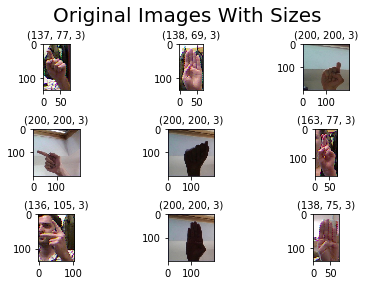

In [5]:
#plot the original images in a subplot with their dimensions as subtitles
axes=[]
fig=plt.figure()
for n in range(9):
    axes.append(fig.add_subplot(3, 3, n+1))
    subplot_title=(str(images[n].shape))
    axes[-1].set_title(subplot_title,fontsize=10)
    plt.imshow(cv2.cvtColor(images[n], cv2.COLOR_BGR2RGB))#this keeps CV2 from reversing the chanels
fig.tight_layout()
plt.subplots_adjust(top=0.85)
fig.suptitle("Original Images With Sizes",fontsize=20)
plt.show()

In [6]:
#pad the images and plot them in a subplot with their dimensions as subtitles
axes=[]
fig=plt.figure()
for n in range(9):
    #calculate padding for images
    old_size = images[n].shape[:2] #(h,w)
    square_size = max(old_size)
    delta_h = square_size - old_size[0]
    delta_w = square_size - old_size[1]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)
    color = [0, 0, 0]
    #replace images with padded versions
    images[n] = cv2.copyMakeBorder(images[n], top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    
    axes.append(fig.add_subplot(3, 3, n+1))
    subplot_title=(str(images[n].shape))
    axes[-1].set_title(subplot_title,fontsize=10)
    plt.imshow(cv2.cvtColor(images[n], cv2.COLOR_BGR2RGB))#this keeps CV2 from reversing the chanels
fig.tight_layout()
plt.subplots_adjust(top=0.85)
fig.suptitle("Padded Images With Sizes",fontsize=20)
plt.show()

In [7]:
#resize the images and plot them in a subplot with their dimensions as subtitles
axes=[]
fig=plt.figure()
for n in range(9):
    new_size = 128#this can be adjusted as desired
    old_size = images[n].shape[0] #images are now square
    if old_size > new_size:
        images[n] = cv2.resize(images[n],(new_size, new_size),interpolation=cv2.INTER_AREA)#prefered interpolation for downsampling
    else:
        images[n] = cv2.resize(images[n],(new_size, new_size),interpolation=cv2.INTER_LINEAR)#prefered interpolation for upsampling
    
    axes.append(fig.add_subplot(3, 3, n+1))
    subplot_title=(str(images[n].shape))
    axes[-1].set_title(subplot_title,fontsize=10)
    plt.imshow(cv2.cvtColor(images[n], cv2.COLOR_BGR2RGB))#this keeps CV2 from reversing the chanels
fig.tight_layout()
plt.subplots_adjust(top=0.85)
fig.suptitle("Normalized Images With Sizes",fontsize=20)
plt.show()

In [8]:
#this is where we would save the new images (if this weren't a demo)
#for n in range(9):
#     cv2.imwrite("newImage"+str(n)+".png", images[n])

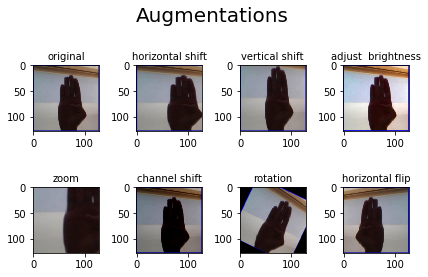

In [9]:
#Demo possible data augmentation (Parts of code taken from "Vardan Agarwal")
axes=[]
fig=plt.figure()
#ALTER IMAGES#
#original
axes.append(fig.add_subplot(2, 4, 1))
subplot_title=("original")
axes[-1].set_title(subplot_title,fontsize=10)
plt.imshow(cv2.cvtColor(images[7], cv2.COLOR_BGR2RGB))#this keeps CV2 from reversing the chanels#horizontal shift
def fill(img, h, w):
    img = cv2.resize(img, (h, w), cv2.INTER_CUBIC)
    return img      
def horizontal_shift(img, ratio=0.25):
    ratio = random.uniform(-ratio, ratio)
    h, w = img.shape[:2]
    to_shift = w*ratio
    if ratio > 0:
        img = img[:, :int(w-to_shift), :]
    if ratio < 0:
        img = img[:, int(-1*to_shift):, :]
    img = fill(img, h, w)
    return img
axes.append(fig.add_subplot(2, 4, 2))
subplot_title=("horizontal shift")
axes[-1].set_title(subplot_title,fontsize=10)
plt.imshow(cv2.cvtColor(horizontal_shift(images[7]), cv2.COLOR_BGR2RGB))#this keeps CV2 from reversing the chanels
#vertical shift
def vertical_shift(img, ratio=0.25):
    ratio = random.uniform(-ratio, ratio)
    h, w = img.shape[:2]
    to_shift = h*ratio
    if ratio > 0:
        img = img[:int(h-to_shift), :, :]
    if ratio < 0:
        img = img[int(-1*to_shift):, :, :]
    img = fill(img, h, w)
    return img
axes.append(fig.add_subplot(2, 4, 3))
subplot_title=("vertical shift")
axes[-1].set_title(subplot_title,fontsize=10)
plt.imshow(cv2.cvtColor(vertical_shift(images[7]), cv2.COLOR_BGR2RGB))#this keeps CV2 from reversing the chanels
#adjust  brightness
def brightness(img, low, high):
    value = random.uniform(low, high)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value 
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img
axes.append(fig.add_subplot(2, 4, 4))
subplot_title=("adjust  brightness")
axes[-1].set_title(subplot_title,fontsize=10)
plt.imshow(cv2.cvtColor(brightness(images[7], 0.5, 3), cv2.COLOR_BGR2RGB))#this keeps CV2 from reversing the chanels
#zoom
def zoom(img, value=0.25):
    value = random.uniform(value, 1)
    h, w = img.shape[:2]
    h_taken = int(value*h)
    w_taken = int(value*w)
    h_start = random.randint(0, h-h_taken)
    w_start = random.randint(0, w-w_taken)
    img = img[h_start:h_start+h_taken, w_start:w_start+w_taken, :]
    img = fill(img, h, w)
    return img
axes.append(fig.add_subplot(2, 4, 5))
subplot_title=("zoom")
axes[-1].set_title(subplot_title,fontsize=10)
plt.imshow(cv2.cvtColor(zoom(images[7]), cv2.COLOR_BGR2RGB))#this keeps CV2 from reversing the chanels
#channel shift
def channel_shift(img, value=50):
    value = int(random.uniform(-value, value))
    img = img + value
    img[:,:,:][img[:,:,:]>255]  = 255
    img[:,:,:][img[:,:,:]<0]  = 0
    img = img.astype(np.uint8)
    return img
axes.append(fig.add_subplot(2, 4, 6))
subplot_title=("channel shift")
axes[-1].set_title(subplot_title,fontsize=10)
plt.imshow(cv2.cvtColor(channel_shift(images[7]), cv2.COLOR_BGR2RGB))#this keeps CV2 from reversing the chanels
#rotation
def rotation(img, angle=30):
    angle = int(random.uniform(-angle, angle))
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
    img = cv2.warpAffine(img, M, (w, h))
    return img
axes.append(fig.add_subplot(2, 4, 7))
subplot_title=("rotation")
axes[-1].set_title(subplot_title,fontsize=10)
plt.imshow(cv2.cvtColor(rotation(images[7]), cv2.COLOR_BGR2RGB))#this keeps CV2 from reversing the chanels
#horizontal flip
axes.append(fig.add_subplot(2, 4, 8))
subplot_title=("horizontal flip")
axes[-1].set_title(subplot_title,fontsize=10)
plt.imshow(cv2.cvtColor(cv2.flip(images[7],1), cv2.COLOR_BGR2RGB))#this keeps CV2 from reversing the chanels
fig.tight_layout()
plt.subplots_adjust(top=0.85)
fig.suptitle("Augmentations",fontsize=20)
plt.show()